In [33]:
import pandas as pd
from alerce.core import Alerce
from astropy.time import Time
import matplotlib.pylab as plt
import numpy as np
#alerce = Alerce()
client = Alerce()


In [2]:
def get_objects_per_class(classearly="SN", pclassearly=0.5, min_nobs=10, max_nobs=50, n_objects=100):

    min_firstmjd = Time("2017-11-01T00:00:00", format="isot", scale="utc").mjd + 70

    objects = client.query_objects(classifier="stamp_classifier",
                                   class_name=classearly,
                                   probability=pclassearly,
                                   ndet=[1, 50],
                                   #order_by="probability",
                                   #order_mode="DESC",
                                   count=False,
                                   first_mjd=[min_firstmjd, None],
                                   page_size=n_objects, 
                                   format='pandas')
    print(objects.shape)
    objects.head()
    objects.set_index("oid", inplace=True)
    objects.sort_values(by="ndet", inplace=True, ascending=False)
    return objects

In [3]:
n_objects = 5000 # Objects per class to query
early_classes = ["AGN", "SN", "VS", "asteroid", "bogus"] # Class identifiers to query objects
objects = {} # Initialize dictionary to use the results per class
min_nobs = 1
for i, cl in enumerate(early_classes):
    print(cl)
    objects[cl] = get_objects_per_class(classearly=cl, min_nobs=min_nobs, n_objects=n_objects)
    if i==0:
        print("Result of a query using the ALeRCE client")
        display(objects[cl].head())
        print("Columns available", objects[cl].columns)

AGN
(5000, 23)
Result of a query using the ALeRCE client


,ndethist,ncovhist,mjdstarthist,mjdendhist,corrected,stellar,ndet,g_r_max,g_r_max_corr,g_r_mean,...,lastmjd,deltajd,meanra,meandec,sigmara,sigmadec,class,classifier,probability,step_id_corr
oid,,,,,,,,,,,,,,,,,,,,,
ZTF23aaoblad,78,2311,59410.441771,60533.353692,True,False,50,0.322957,0.172060,0.220075,...,60533.353692,419.930440,345.063227,1.088914,0.025821,0.025817,AGN,stamp_classifier,0.719585,24.5.2a6
ZTF21abydepu,85,2817,58600.317373,60527.260289,True,False,50,NaN,NaN,NaN,...,60527.260289,412.896562,309.427148,79.135780,0.119971,0.022612,AGN,stamp_classifier,0.680768,24.5.2a6
ZTF20abnmwyg,143,1621,59030.466863,60538.413252,True,False,50,0.085280,0.184207,0.094810,...,60538.413252,1507.946389,350.510457,10.277020,0.025418,0.025010,AGN,stamp_classifier,0.837194,24.5.2a6
ZTF23aarfnju,99,1356,58672.463947,60534.401007,True,False,50,-0.152363,0.102089,-0.141748,...,60534.401007,397.939653,5.848534,4.703818,0.030459,0.030357,AGN,stamp_classifier,0.632842,24.5.2a6
ZTF23aarfnow,75,1801,59874.305764,60526.465243,True,False,50,0.565613,0.511915,0.310220,...,60526.465243,389.998380,52.374879,37.989068,0.055993,0.044129,AGN,stamp_classifier,0.638599,24.5.2a6


Columns available Index(['ndethist', 'ncovhist', 'mjdstarthist', 'mjdendhist', 'corrected',
       'stellar', 'ndet', 'g_r_max', 'g_r_max_corr', 'g_r_mean',
       'g_r_mean_corr', 'firstmjd', 'lastmjd', 'deltajd', 'meanra', 'meandec',
       'sigmara', 'sigmadec', 'class', 'classifier', 'probability',
       'step_id_corr'],
      dtype='object')
SN
(5000, 23)
VS
(5000, 23)
asteroid
(5000, 23)
bogus
(5000, 23)


In [68]:
stamps = []
for i, cl in enumerate(early_classes):
    stamp_temp = client.get_stamps(objects[cl].index["oid"])
    stamps.append(stamps)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [67]:
objects.get("AGN")

,ndethist,ncovhist,mjdstarthist,mjdendhist,corrected,stellar,ndet,g_r_max,g_r_max_corr,g_r_mean,...,lastmjd,deltajd,meanra,meandec,sigmara,sigmadec,class,classifier,probability,step_id_corr
oid,,,,,,,,,,,,,,,,,,,,,
ZTF23aaoblad,78,2311,59410.441771,60533.353692,True,False,50,0.322957,0.172060,0.220075,...,60533.353692,419.930440,345.063227,1.088914,0.025821,0.025817,AGN,stamp_classifier,0.719585,24.5.2a6
ZTF21abydepu,85,2817,58600.317373,60527.260289,True,False,50,NaN,NaN,NaN,...,60527.260289,412.896562,309.427148,79.135780,0.119971,0.022612,AGN,stamp_classifier,0.680768,24.5.2a6
ZTF20abnmwyg,143,1621,59030.466863,60538.413252,True,False,50,0.085280,0.184207,0.094810,...,60538.413252,1507.946389,350.510457,10.277020,0.025418,0.025010,AGN,stamp_classifier,0.837194,24.5.2a6
ZTF23aarfnju,99,1356,58672.463947,60534.401007,True,False,50,-0.152363,0.102089,-0.141748,...,60534.401007,397.939653,5.848534,4.703818,0.030459,0.030357,AGN,stamp_classifier,0.632842,24.5.2a6
ZTF23aarfnow,75,1801,59874.305764,60526.465243,True,False,50,0.565613,0.511915,0.310220,...,60526.465243,389.998380,52.374879,37.989068,0.055993,0.044129,AGN,stamp_classifier,0.638599,24.5.2a6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZTF18aarofwe,2,5147,58543.500000,60140.250000,True,True,1,NaN,NaN,NaN,...,60140.257720,0.000000,213.701851,62.356830,NaN,NaN,AGN,stamp_classifier,0.523056,1.2.0
ZTF18abxxtwb,4,5111,59364.250000,60140.250000,True,True,1,NaN,NaN,NaN,...,60140.257720,0.000000,212.327853,62.484350,NaN,NaN,AGN,stamp_classifier,0.636336,1.2.0
ZTF21abpqeja,3,5147,59364.250000,60140.250000,True,True,1,NaN,NaN,NaN,...,60140.257720,0.000000,213.397968,62.721576,NaN,NaN,AGN,stamp_classifier,0.587482,1.2.0


In [15]:
all_stamps = []
for key in objects.keys():
    all_stamps.append(objects.get(key))

In [66]:
all_stamps[0].iloc[0]

ndethist                       78
ncovhist                     2311
mjdstarthist         59410.441771
mjdendhist           60533.353692
corrected                    True
stellar                     False
ndet                           50
g_r_max                  0.322957
g_r_max_corr              0.17206
g_r_mean                 0.220075
g_r_mean_corr            0.171282
firstmjd             60113.423252
lastmjd              60533.353692
deltajd                 419.93044
meanra                 345.063227
meandec                  1.088914
sigmara                  0.025821
sigmadec                 0.025817
class                         AGN
classifier       stamp_classifier
probability              0.719585
step_id_corr             24.5.2a6
Name: ZTF23aaoblad, dtype: object

In [57]:
np.isnan(all_stamps[0].iloc[0]).any()


TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [51]:
filtered_stamps = []
for stamp in all_stamps:
        for i, obj in enumerate(stamp):
                for j, data in obj:
                        if np.isnan(stamp.iloc[i][j]).any():
                                pass
                        else:
                                filtered_stamps.append(stamp[2])

(22,)


TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [21]:
all_stamps[0]["probability"]

oid
ZTF23aaoblad    0.719585
ZTF21abydepu    0.680768
ZTF20abnmwyg    0.837194
ZTF23aarfnju    0.632842
ZTF23aarfnow    0.638599
                  ...   
ZTF18aarofwe    0.523056
ZTF18abxxtwb    0.636336
ZTF21abpqeja    0.587482
ZTF18aauyiil    0.675484
ZTF23aasmizg    0.502495
Name: probability, Length: 5000, dtype: float64

(array([944., 756., 691., 608., 586., 536., 429., 279., 148.,  23.]),
 array([0.5000917 , 0.54418809, 0.58828448, 0.63238087, 0.67647726,
        0.72057365, 0.76467004, 0.80876643, 0.85286282, 0.89695921,
        0.9410556 ]),
 <BarContainer object of 10 artists>)

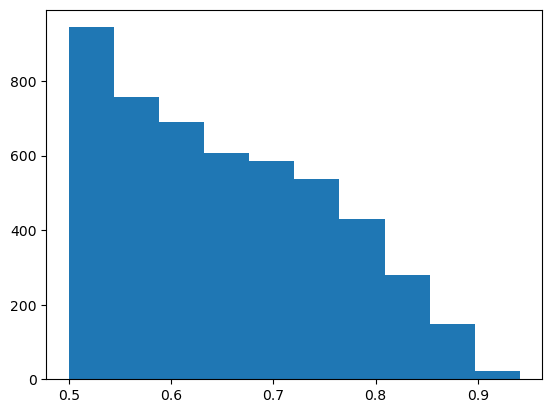

In [31]:
plt.hist(all_stamps[1]["probability"])

In [28]:
all_stamps

[             ndethist  ncovhist  mjdstarthist    mjdendhist  corrected  \
 oid                                                                      
 ZTF23aaoblad       78      2311  59410.441771  60533.353692       True   
 ZTF21abydepu       85      2817  58600.317373  60527.260289       True   
 ZTF20abnmwyg      143      1621  59030.466863  60538.413252       True   
 ZTF23aarfnju       99      1356  58672.463947  60534.401007       True   
 ZTF23aarfnow       75      1801  59874.305764  60526.465243       True   
 ...               ...       ...           ...           ...        ...   
 ZTF18aarofwe        2      5147  58543.500000  60140.250000       True   
 ZTF18abxxtwb        4      5111  59364.250000  60140.250000       True   
 ZTF21abpqeja        3      5147  59364.250000  60140.250000       True   
 ZTF18aauyiil        5      5111  59281.250000  60140.250000       True   
 ZTF23aasmizg        1      1593  60142.500000  60142.500000       True   
 
               stellar 

In [29]:
objects.keys()

dict_keys(['AGN', 'SN', 'VS', 'asteroid', 'bogus'])